In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import xmeos
from xmeos import models

%matplotlib notebook

kboltz = models.CONSTS['kboltz']

In [7]:
dat = pd.read_csv('data/MgSiO3-electron-entropy-deKoker2009.csv')

In [8]:
eos_mod = models.ElectronicEos(kind='CvPowLaw')
eos_mod.entropy(50,8000)/xmeos.models.CONSTS['kboltz']

eos_mod.set_param_values(param_names=['V0', 'Tel0', 'TelExp', 'CvelFac0', 'CvelFacExp' ],
                        param_values=[12.97, 3000, -.3, 2.7e-4,+.6])
param0 = eos_mod.get_param_values(param_names=['Tel0', 'TelExp', 'CvelFac0', 'CvelFacExp'])
V0, = eos_mod.get_param_values(param_names=['V0']) 

Vfrac = np.linspace(.35,1.25,1001)
Vmod = V0*Vfrac

<IPython.core.display.Javascript object>


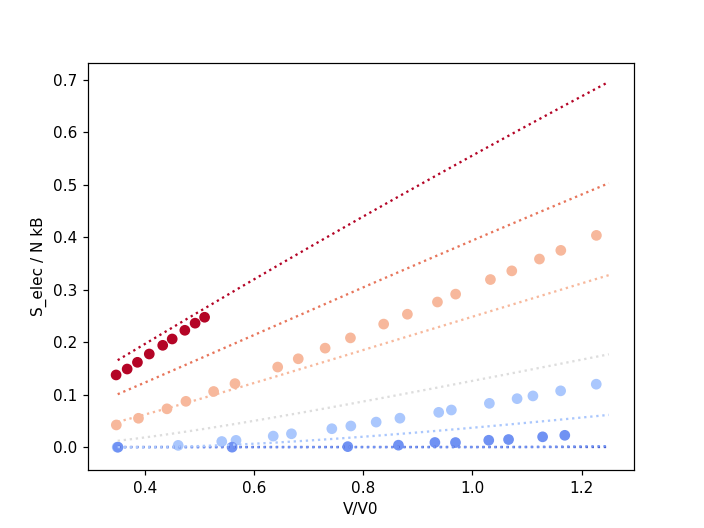

In [9]:
# Initial fit by hand

plt.figure()


T0_ref = 4000

cmap = plt.get_cmap('coolwarm',7)
plt.scatter(dat['Vratio'],dat['S'],c=dat['T'],cmap=cmap)


Tmod = [2000,3000,4000,5000,6000,7000,8000]

for T in Tmod:
    plt.plot(Vfrac, eos_mod.entropy(Vmod,T)/kboltz,':',
             color=cmap((T-2000)/(8000-2000)))
    
# plt.colorbar()
plt.clim(1500,8500)
plt.xlabel('V/V0')
plt.ylabel('S_elec / N kB')

<IPython.core.display.Javascript object>


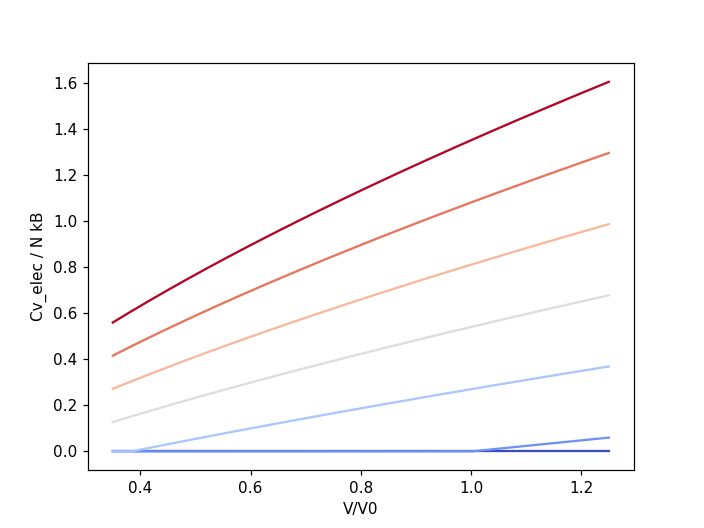

In [10]:
plt.figure()

for T in Tmod:
    plt.plot(Vfrac, eos_mod.heat_capacity(Vmod,T)/kboltz,'-',
             color=cmap((T-2000)/(8000-2000)))
    
    

plt.xlabel('V/V0')
plt.ylabel('Cv_elec / N kB')

In [11]:
def resid_S_elec(param, Vratio=dat['Vratio'], T=dat['T'], S=dat['S'], eos_mod=eos_mod):

    param_names = ['Tel0', 'TelExp', 'CvelFac0', 'CvelFacExp']
    eos_mod.set_param_values(param_names=param_names, param_values=param)
    V0, = eos_mod.get_param_values(param_names=['V0']) 
    V = Vratio*V0
    
    Smodel = eos_mod.entropy(V, T)/kboltz
    resid_S = Smodel-S
    
    return resid_S

In [12]:
results = optimize.leastsq(resid_S_elec,param0)
paramf = results[0]
print(paramf)
param_names = ['Tel0', 'TelExp', 'CvelFac0', 'CvelFacExp']
eos_mod.set_param_values(param_names=param_names, param_values=paramf)


[  2.46659883e+03  -4.57801641e-01   2.27133196e-04   6.77736044e-01]


<IPython.core.display.Javascript object>


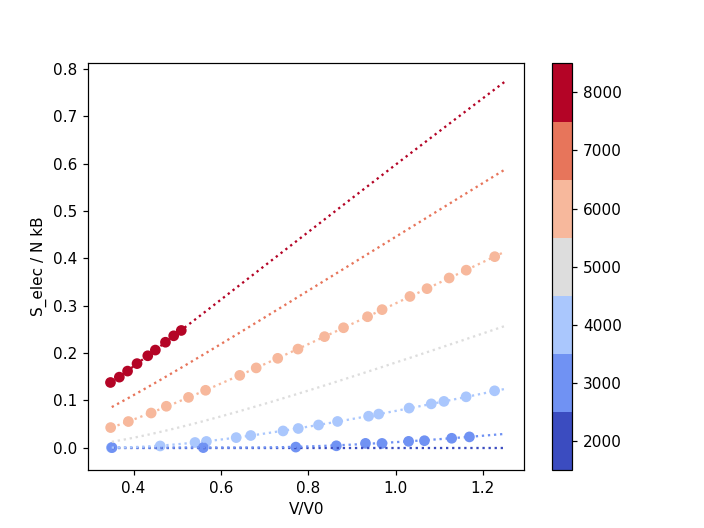

In [14]:

plt.figure()

plt.scatter(dat['Vratio'],dat['S'],c=dat['T'],cmap=cmap)

Tmod = [2000,3000,4000,5000,6000,7000,8000]

for T in Tmod:
    plt.plot(Vfrac, eos_mod.entropy(Vmod,T)/kboltz,':',
             color=cmap((T-2000)/(8000-2000)))

plt.colorbar()
plt.clim(1500,8500)
plt.xlabel('V/V0')
plt.ylabel('S_elec / N kB')

<IPython.core.display.Javascript object>


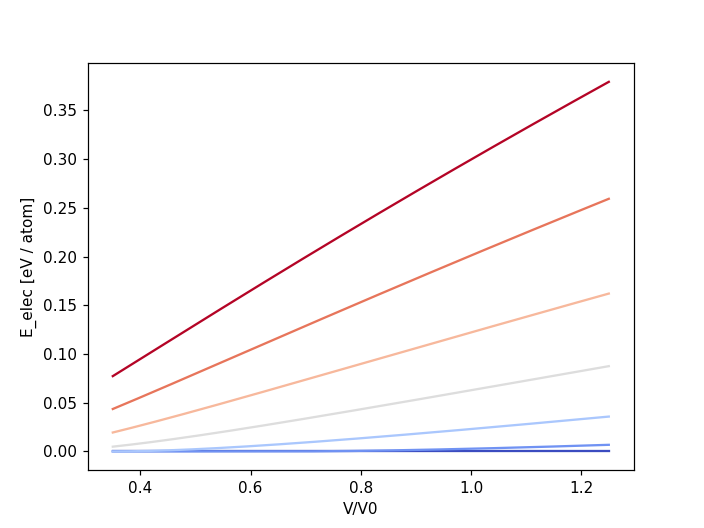

In [17]:
plt.figure()

for T in Tmod:
    plt.plot(Vfrac, eos_mod.energy(Vmod,T),'-',
             color=cmap((T-2000)/(8000-2000)))


plt.xlabel('V/V0')
plt.ylabel('E_elec [eV / atom]')

<IPython.core.display.Javascript object>


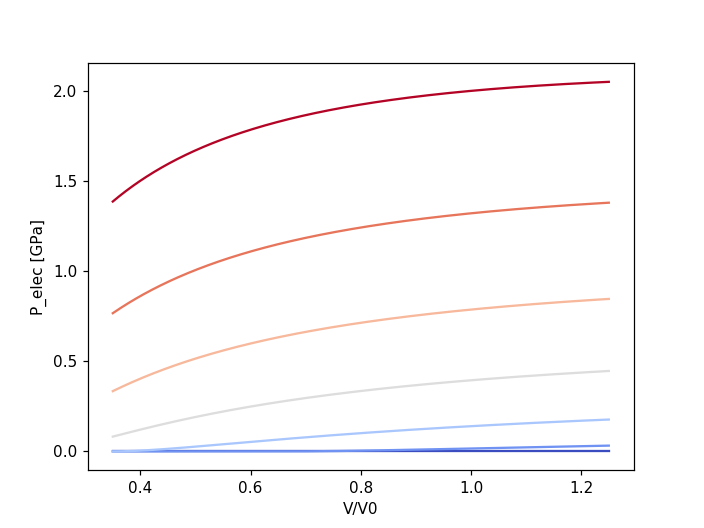

In [18]:
V0, = eos_mod.get_param_values(param_names=['V0'])
plt.figure()

for T in Tmod:
    plt.plot(Vfrac, eos_mod.press(Vfrac*V0,T),'-',
             color=cmap((T-2000)/(8000-2000)))
    
plt.xlabel('V/V0')
plt.ylabel('P_elec [GPa]')